## Import package

In [1]:
import mbil

In [2]:
from mbil import dataset

In [3]:
from mbil import scores

In [4]:
from mbil import mbilsearch

In [5]:
from mbil import mbilscore

In [6]:
from mbil import output

## Input settings

In [7]:
dataset_input_directory="C:/Users/CHX37/PycharmProjects/MBIL/datasets/TEST.txt"
#dataset_input_directory="/Users/xij6/Documents/Research/git/XiaJiang-2Github/MBIL/datasets/TEST.txt"
alpha = 4
target = "E"
top = 20
max_single_predictors = 20
max_interaction_predictors = 20
max_size_interaction = 3
threshold = 0.05
maximum_number_of_parents=7

## Created score_test_obj

In [8]:
dataset_df = dataset.ReadDataset(file=dataset_input_directory, sep='\t').dataset_df

In [9]:
score_test_obj = mbilscore.mbilscore(dataset_df=dataset_df, target=target, alpha = alpha)

## Created search_test_obj

In [10]:
search_test_obj = mbilsearch.mbilsearch(threshold=threshold,
                                           max_single_predictors= max_single_predictors,
                                           max_interaction_predictors=max_interaction_predictors,
                                           max_size_interaction= max_size_interaction,
                                           dataset_df = dataset_df,
                                           alpha = alpha,
                                           target = target)



## Created direct_cause_obj

In [11]:
direct_cause_obj = mbilsearch.directCause(
    new_dataset = search_test_obj.transformed_dataset,
    alpha= alpha,
    target = target,
    maximum_number_of_parents = maximum_number_of_parents)

## Created output_obj

In [12]:
output_path = "output/"
dataset_name = "Test"

In [13]:
all_input_hash_map = {"alpha": alpha,
                      "target":target, 
                      "top":top, 
                      "max_single_predictors":max_single_predictors, 
                      "max_interaction_predictors":max_interaction_predictors,
                      "max_size_interaction":max_size_interaction, 
                      "threshold":threshold, 
                      "maximum_number_of_parents":maximum_number_of_parents}

In [14]:
number_of_predictors = dataset_df.shape[1] - 1
number_of_records = dataset_df.shape[0]
dataset_information = {"number_of_predictors":number_of_predictors, "number_of_records":number_of_records}

In [15]:
output_obj = output.output(
                           output_path = output_path,
                           dataset_name = dataset_name , 
                           all_input = all_input_hash_map, 
                           dataset_path = dataset_input_directory, 
                           dataset_information = dataset_information, 
                           null_score = score_test_obj.calculate_score(top = top, subset_size = 0), 
                           single_score = search_test_obj.single_list_score, 
                           interaction_score = search_test_obj.interaction_list_score, 
                           direc_cause = direct_cause_obj.direc_cause)

## Specific functions and variables of score_test_obj

### 1. calculate_score(top = top, subset_size = "what subset size you want")

In [16]:
null_score = score_test_obj.calculate_score(top = top, subset_size = 0)

In [17]:
null_score

[('[]', -3.8430301339411947)]

In [18]:
score_subsetsize2 = score_test_obj.calculate_score(top = top, subset_size = 2)

In [19]:
score_subsetsize2

[("['B', 'C']", -3.753417975251508),
 ("['B', 'F']", -4.158883083359674),
 ("['B', 'D']", -4.382026634673884),
 ("['C', 'D']", -4.382026634673884),
 ("['D', 'F']", -4.382026634673884),
 ("['C', 'F']", -4.85203026391962)]

### 2. calculate_information_gain (top = top, subset_size = "what subset size you want")

In [20]:
null_information_gain = score_test_obj.calculate_information_gain(top = top, subset_size = 0)

In [21]:
null_information_gain

[('[]', 1)]

In [22]:
information_gain_subsetsize2 = score_test_obj.calculate_information_gain(top = top, subset_size = 2)

In [23]:
information_gain_subsetsize2

[("['D', 'F']", 0.5709505944546686),
 ("['B', 'C']", 0.5709505944546684),
 ("['B', 'F']", 0.5709505944546684),
 ("['C', 'D']", 0.5709505944546684),
 ("['B', 'D']", 0.4199730940219749),
 ("['C', 'F']", 0.17095059445466854)]

### 3. plot bar graph with score result

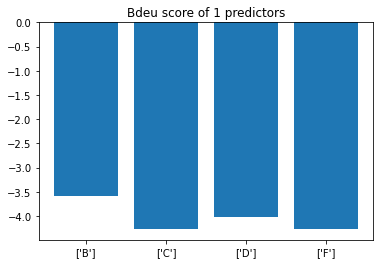

In [24]:
score_test_obj.plot_score(subset_size = 1)

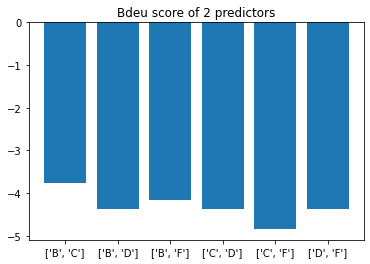

In [25]:
score_test_obj.plot_score(subset_size = 2)

### 4. plot bar graph with information gain result

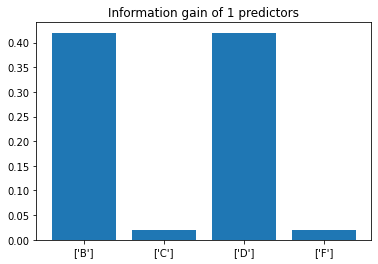

In [26]:
score_test_obj.plot_information_gain(subset_size = 1)

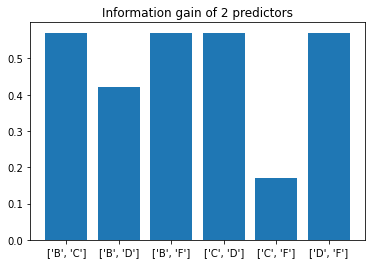

In [27]:
score_test_obj.plot_information_gain(subset_size = 2)

## Specific functions and variables of search_test_obj

### 1. Print single_predictor list after search

In [28]:
## don't need to output to csv file, please use the output 
single_list = search_test_obj.single_list_score

In [29]:
single_list

[('B', -3.5835189384561104)]

### 2. Print interaction_predictor list after search

In [30]:
interactions_list = search_test_obj.interaction_list_score

In [31]:
interactions_list

[("['B', 'C']", -3.753417975251508),
 ("['B', 'F']", -4.158883083359674),
 ("['C', 'D']", -4.382026634673884),
 ("['D', 'F']", -4.382026634673884),
 ("['C', 'F']", -4.85203026391962)]

### 3. Print transformed dataset

In [32]:
search_test_obj.transformed_dataset

,B,"['B', 'C']","['B', 'F']","['C', 'D']","['D', 'F']","['C', 'F']",E
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,2,2,2,2,2,0
3,1,2,2,2,2,2,1
4,0,0,3,3,3,1,0


### 4. Plot bar gragh of the final score result

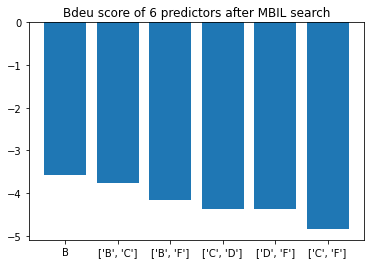

In [33]:
search_test_obj.plot_score_aftersearch()

## Specific functions and variables of direc_cause_object

### Print the direct cause 

In [34]:
direct_cause_obj.direc_cause

['B']

## Specific functions and variables of output_obj

In [35]:
output_obj.output_log(output_path = "output/")

Put log file in output/ successfully


In [36]:
output_obj.output_single_predictors(output_path = "output/" )

Put single nodes file in output/ successfully


In [37]:
output_obj.output_interaction_predictors(output_path = "output/" )

Put interaction nodes file in output/ successfully


In [38]:
output_obj.output_direct_cause(output_path = "output/" )

Put direct cause file in output/ successfully


In [39]:
help(mbil)

Help on package mbil:

NAME
    mbil

PACKAGE CONTENTS
    dataset
    mbilscore
    mbilsearch
    output
    scores

FILE
    c:\users\chx37\pycharmprojects\mbil\mbil\__init__.py




In [41]:
help(mbilsearch)

Help on module mbil.mbilsearch in mbil:

NAME
    mbil.mbilsearch

CLASSES
    builtins.object
        directCause
        mbilsearch
    
    class directCause(builtins.object)
     |  directCause(new_dataset, alpha, target, maximum_number_of_parents)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, new_dataset, alpha, target, maximum_number_of_parents)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  detecting_direct_cause(self)
     |      A function to detect the true parents according to the parent list, parent_list will be like B  ['B', 'C']  ['B', 'F']  ['C', 'D']  ['D', 'F']  ['C', 'F']
     |      
     |      :return float: a list including all direct cause according to the parent list
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  _

In [44]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\CHX37\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [45]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [46]:
y

array([False, False, False, ..., False, False,  True])

In [47]:
shap_values

array([[ 2.5884783e-01, -5.2761453e-01,  5.0065815e-01, ...,
        -4.3836612e-02, -1.8832082e-01,  2.8128279e-02],
       [ 4.6454713e-01, -4.1367236e-01,  6.4607859e-01, ...,
        -1.2133481e-01, -1.3872738e+00,  2.6299430e-02],
       [ 9.6986182e-02,  4.6485234e-02, -4.5227489e-01, ...,
        -4.0750906e-02, -1.5437643e-01,  9.3873059e-03],
       ...,
       [ 8.4919733e-01,  2.4512282e-02, -3.5189843e-01, ...,
        -3.9598301e-02, -1.5580623e-01,  4.5106687e-02],
       [-2.5407739e+00, -3.2143570e-02, -4.2140725e-01, ...,
        -6.6437408e-02, -1.4061410e+00, -1.3017098e-03],
       [ 8.9822495e-01,  1.8341091e-01, -2.8088182e-01, ...,
        -2.8488135e-02,  7.8036055e-02,  2.0374283e-02]], dtype=float32)

In [48]:
len(shap_values)

32561

In [49]:
len(shap_values[0])

12

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


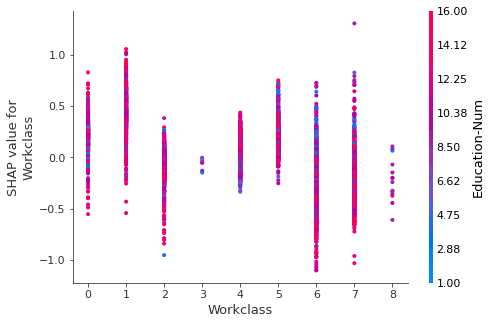

In [51]:
shap.dependence_plot(1, shap_values, X)

In [52]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


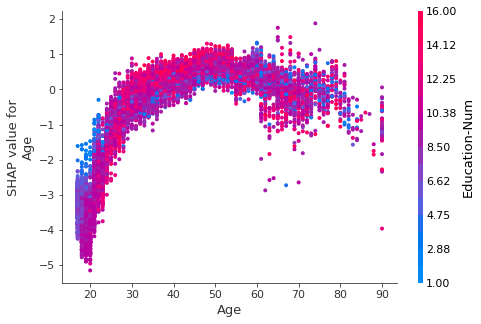

In [53]:
shap.dependence_plot(0, shap_values, X.values, feature_names=X.columns)

In [54]:
 X.values[0]

array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9., ...,  0., 40., 39.]])

In [56]:
 len(X.values[0])

12

In [55]:
X.columns

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [57]:
shap.plots.bar(shap_values)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

In [58]:
shap.waterfall_plot(
            shap.Explanation(
                base_values=explainer.expected_value,
                values=shap_values_for_forceplot_waterfallplot,
                data=shap_values_for_forceplot_waterfallplot_validation,
                feature_names=X_columns))

NameError: name 'shap_values_for_forceplot_waterfallplot' is not defined

In [ ]:
shap.bar_plot(shap_values, features=None, feature_names=None, max_display=None, show=True)